pip install seaborn===0.8.1

### imports 
to complete this assignment we wil use Pandas for data analysis and Seaborn for visualization

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [6]:
# let's check the version of seaborn
sns.__version__

'0.8.1'

loading the data

In [13]:
diagnosis = pd.read_csv('Patient_Diagnosis.csv')
treatments = pd.read_csv('Patient_Treatment.csv')

Let's take a peek at the data'

In [14]:
diagnosis.head()

,Patient_ID,Diagnosis_Date,Diagnosis_Code,Diagnosis
0,2038,1/21/10,174.9,Breast Cancer
1,2120,1/9/10,174.1,Breast Cancer
2,2175,2/17/10,174.7,Breast Cancer
3,2407,6/13/10,174.9,Breast Cancer
4,2425,12/15/10,174.9,Breast Cancer


treatments.head()

first thing to do is t clean the data and find out if the data has an any noise/strange data/outliers that don't make sense'

In [16]:
treatments.dtypes

Patient_ID         int64
Treatment_Date    object
Drug_Code         object
dtype: object

In [17]:
diagnosis.dtypes

Patient_ID          int64
Diagnosis_Date     object
Diagnosis_Code    float64
Diagnosis          object
dtype: object

we should convert the dates from objects/strings into to Datetime objects

In [30]:
diagnosis.Diagnosis_Date = pd.to_datetime(diagnosis.Diagnosis_Date)

In [31]:
treatments.Treatment_Date = pd.to_datetime(treatments.Treatment_Date)

In [32]:
treatments.dtypes

Patient_ID                 int64
Treatment_Date    datetime64[ns]
Drug_Code                 object
dtype: object

In [29]:
diagnosis.dtypes

Patient_ID                 int64
Diagnosis_Date    datetime64[ns]
Diagnosis_Code           float64
Diagnosis                 object
dtype: object

In [34]:
# pd.infer_objects() - available in later version of pandas

Now we are ready to start answering questions

Question 1: Cancer type breakdown
    
"First the curious is to know which diseases they are treating patients. How many patients does the clinic have for each cancer type?"

Need to make sure the number of diagnoses matches the number of patients, if not then a patient can have multiple diagnosis

In [43]:
# number of patients
print (len(diagnosis.Patient_ID.unique()))
print(len(diagnosis.Patient_ID), 'diagnoses') # there are ten more diagnosis than patients

37
47 diagnoses


In [44]:
diagnosis.duplicated('Patient_ID', keep=False) # outputs True or False based on whether or not it is a duplicate or not -- then only keeps those that are False for duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
14    False
15     True
16     True
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25     True
26     True
27     True
28     True
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
dtype: bool

In [48]:
diagnosis[diagnosis.duplicated('Patient_ID', keep=False)].sort_values(['Patient_ID','Diagnosis_Date']) # creates new dataframe to get red of values with value of false, dot matrix multiplication

,Patient_ID,Diagnosis_Date,Diagnosis_Code,Diagnosis
11,3449,2011-09-09,153.5,Colon Cancer
42,3449,2011-09-09,153.4,Colon Cancer
13,3757,2011-10-11,174.1,Breast Cancer
12,3757,2011-10-17,153.4,Colon Cancer
43,3757,2011-10-17,153.5,Colon Cancer
15,4256,2011-11-07,174.5,Breast Cancer
44,4256,2011-11-07,174.8,Breast Cancer
16,4354,2012-02-04,174.8,Breast Cancer
45,4354,2012-02-04,174.5,Breast Cancer
17,4374,2012-03-20,174.5,Breast Cancer


In [54]:
# make a copy of the diagnosis dataframe
diagnosis_copy = diagnosis.copy()

# convert diagnosis codes to string and join them by commas for the same patient, we don't have to worry about the 'Diagnosis' field since it's already a string

diagnosis_copy.Diagnosis_Code = diagnosis.Diagnosis_Code.apply(str) #override column with string cversions of the data
unique_codes = diagnosis_copy.groupby(diagnosis_copy.Patient_ID).agg(lambda x: ','.join(x.values)) # joining values with a comma between columns; grouped by the patient ID

# remove duplicates from 'Diagnosis column --

unique_codes.Diagnosis = unique_codes.Diagnosis.str.split(',').\
apply(lambda x: list(set(x))).\
apply(lambda x: ','.join(x))


# addd colon and breast indicator vaariables boolean
unique_codes['breast'] = unique_codes['Diagnosis'].str.contains('Breast')
unique_codes['colon'] = unique_codes['Diagnosis'].str.contains('Colon')


In [56]:
unique_codes.head()

,Diagnosis_Code,Diagnosis,breast,colon
Patient_ID,,,,
2038,174.9,Breast Cancer,True,False
2120,174.1,Breast Cancer,True,False
2175,174.7,Breast Cancer,True,False
2407,174.9,Breast Cancer,True,False
2425,174.9,Breast Cancer,True,False


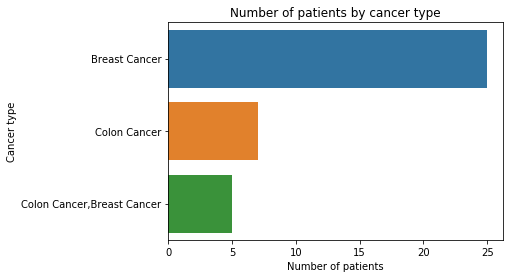

In [57]:
# plot// countplot shows the count of obserations in each categorical bin

sns.countplot(y=unique_codes.Diagnosis)
# _ means that it applies to the entire canvas/cartessian plane
_=plt.title('Number of patients by cancer type')
_=plt.xlabel('Number of patients')
_=plt.ylabel('Cancer type')

# How long after diagnosis do patients start treatment?

"The clinic wants to know how long it takes for patients to start therapy after being diagnosed, which they consider to be helpful in understanding the quality of care for the patient. How long after diagnosed do patients start treatment?"